### Experiment in ways to prevent chronological prediction spiking 
(dampen signals that are very diferent from imediate previous prediction).

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

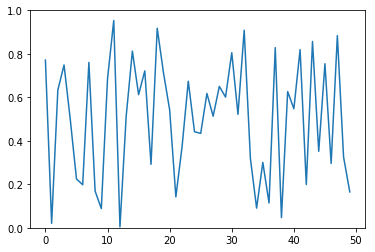

In [14]:
np.random.seed(10)
data = np.random.rand(50)

plt.plot(data)
plt.ylim(0,1)
plt.show()

We want to apply small changes with more weight than large changes

Were $y$ is the output, $x$ is the predictions from the model and $d$ is a constant $>= 1$ that controls the amount to dampen the signal.

The smoothed/dampended signal is equal to:

$$y^{n} = y^{n-1} + (x^{n}-y^{n-1})\cdot \frac{1-\left | x^{n} - y^{n-1}  \right |}{d}$$

If the difference (residual) between the last output ($y^{n-1}$) and the current prediction ($x^{n}$) is represented as $r$:

$$ r = x^{n}-y^{n-1} $$

The the equation is easier to look at:

$$y^{n} = y^{n-1} + r\cdot \frac{1-\left | r  \right |}{d}$$

The weight dropoff looks like the following:


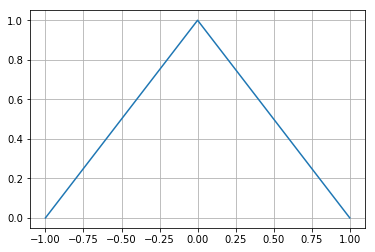

In [15]:
f = lambda x:(1-abs(x)/1)
x_input = [ (x-5)/5 for x in range(11) ]
y = [f(x) for x in x_input]
plt.plot(x_input, y)
plt.grid()
plt.show()

## Implimentation of linear prediction dampen

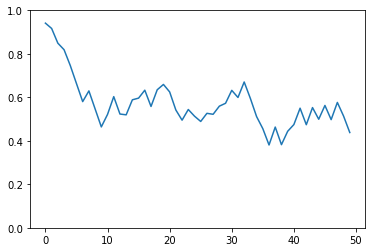

In [16]:
smoothed = []
prev = 1
dampener_factor = 3

for val in data:
    residual =  (val - prev)
    weight = (1-abs(residual))/dampener_factor
    addition = weight * residual
    next_val = prev + addition
    smoothed.append(next_val)
    prev = next_val
    
plt.plot(smoothed)
plt.ylim(0,1)
plt.show()

Another version instead of a linear weight we could have an exponetial weight:

$$y^{n} = y^{n-1} + r\cdot 2^{-\left | \frac{r}{d} \right |}$$

The weight function looks like the following:

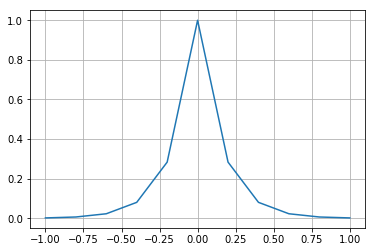

In [17]:
f = lambda x:(2**(-abs(x/0.11)))
x_input = [ (x-5)/5 for x in range(11) ]
y = [f(x) for x in x_input]
plt.plot(x_input, y)
plt.grid()
plt.show()

## Implimentation of exponential prediction dampen

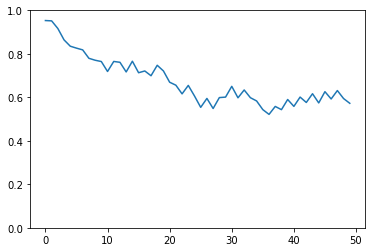

In [18]:
smoothed = []
prev = 1
dampener_factor = 0.10

for val in data:
    residual =  (val - prev)
    weight = 2**(-abs(residual/dampener_factor))
    addition = weight * residual
    next_val = prev + addition
    smoothed.append(next_val)
    prev = next_val
    
plt.plot(smoothed)
plt.ylim(0,1)
plt.show()